<a href="https://colab.research.google.com/github/Abishek0411/Computer-Vision-Projects/blob/main/CV_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 1 — Image Processing Foundations**

In [ ]:
# !pip -q install opencv-python-headless==4.7.0.72 scikit-image matplotlib numpy scipy scikit-learn
import cv2, sys, os, numpy as np, matplotlib.pyplot as plt
from skimage import filters, feature, morphology, measure, color, io
plt.rcParams['figure.figsize'] = (10,6)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


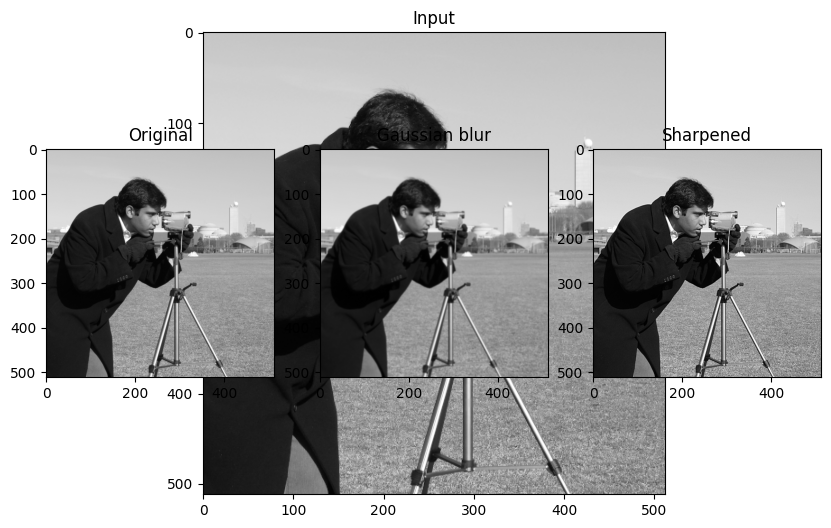

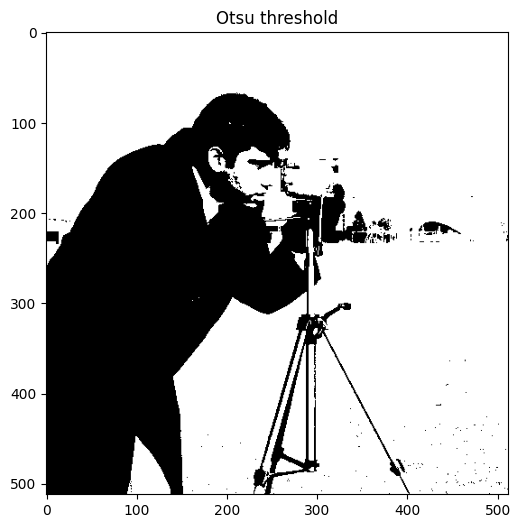

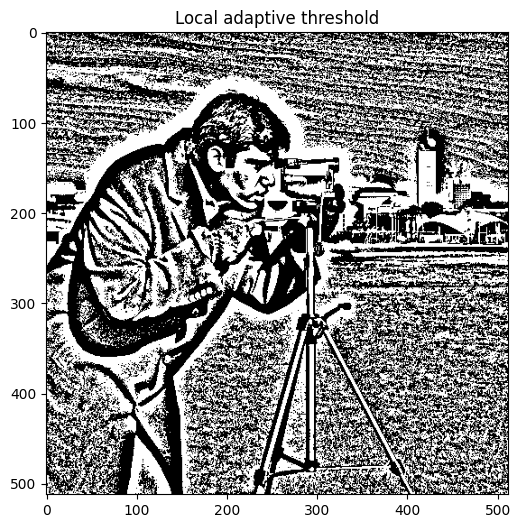

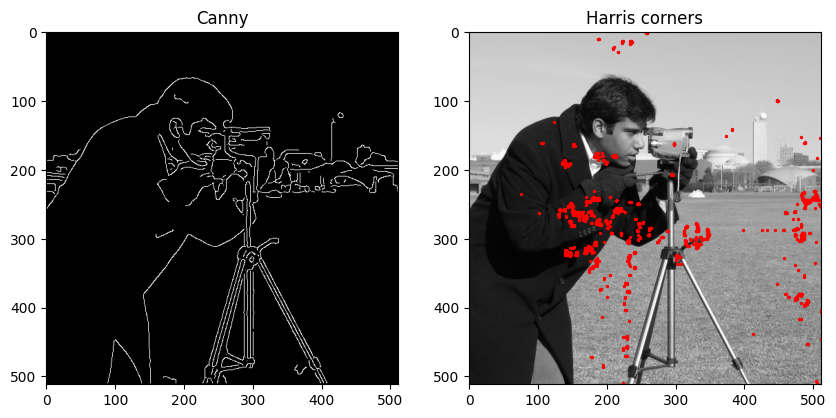

In [ ]:
# Load example
from skimage import data, img_as_float
img = img_as_float(data.camera())  # grayscale 512x512
plt.imshow(img, cmap='gray'); plt.title("Input")

# Gaussian blur and sharpening
from skimage.filters import gaussian, unsharp_mask
blur = gaussian(img, sigma=1)
sharp = unsharp_mask(img, radius=1, amount=1)
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title('Original')
plt.subplot(1,3,2); plt.imshow(blur, cmap='gray'); plt.title('Gaussian blur')
plt.subplot(1,3,3); plt.imshow(sharp, cmap='gray'); plt.title('Sharpened')

# Thresholding: global (Otsu) and adaptive
from skimage.filters import threshold_otsu
th = threshold_otsu(img)
bw_otsu = img > th
plt.figure(); plt.imshow(bw_otsu, cmap='gray'); plt.title('Otsu threshold')

# Adaptive threshold (local)
from skimage.filters import threshold_local
local_thresh = threshold_local(img, block_size=35, method='gaussian')
bw_local = img > local_thresh
plt.figure(); plt.imshow(bw_local, cmap='gray'); plt.title('Local adaptive threshold')

# Edges and corners
edges = feature.canny(img, sigma=2)
corners = cv2.cornerHarris((img*255).astype('uint8'), 2, 3, 0.04)
plt.figure(); plt.subplot(1,2,1); plt.imshow(edges, cmap='gray'); plt.title('Canny')
plt.subplot(1,2,2); plt.imshow(img, cmap='gray'); plt.title('Harris corners');
plt.scatter(*np.nonzero(corners>0.01*corners.max()), s=2, c='r')
